In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.4 MB/s eta 0:00:00


In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [9]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(180,180)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(180,180)
)

Found 4842 files belonging to 9 classes.
Found 118 files belonging to 9 classes.


In [10]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [11]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(180,180,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(9,activation='softmax'))




In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=30,validation_data=validation_ds)

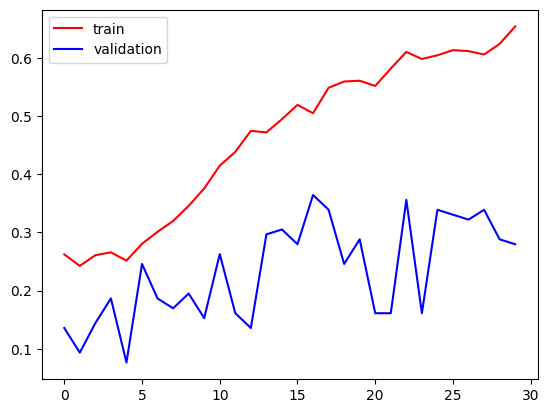

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

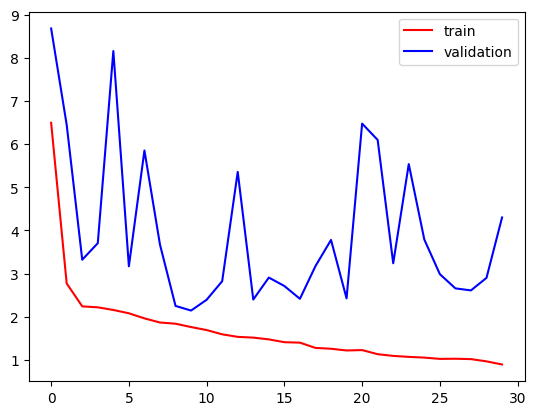

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# Assuming train_ds is your training dataset and its labels are one-hot encoded

class_counts = {}

# Iterate over the training dataset to count class occurrences
for images, labels in validation_ds:
    class_indices = np.argmax(labels, axis=1)
    for class_index in class_indices:
        class_counts[class_index] = class_counts.get(class_index, 0) + 1

# Print the counts
for class_index, count in class_counts.items():
    print(f"Class {class_index}: {count} occurrences")


Class 3: 16 occurrences
Class 5: 16 occurrences
Class 0: 16 occurrences
Class 7: 16 occurrences
Class 4: 16 occurrences
Class 2: 16 occurrences
Class 1: 16 occurrences
Class 8: 3 occurrences
Class 6: 3 occurrences


In [ ]:
!pip install Augmentor

In [ ]:
# checking the images in the folder
import os

folder_path = '/content/drive/MyDrive/cnn dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion'

# Get the list of files in the folder
files = os.listdir(folder_path)

# Count the number of files
num_files = len(files)

# Print the count
print("Number of files in the folder:", num_files)


Number of files in the folder: 440


In [ ]:
# aumentation
import Augmentor
p = Augmentor.Pipeline("/content/drive/MyDrive/cnn dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion")
# Point to a directory containing ground truth data.
# Images with the same file names will be added as ground truth data
# and augmented in parallel to the original data.
# p.ground_truth("/path/to/ground_truth_images")
# Add operations to the pipeline as normal:
p.rotate(probability=1, max_left_rotation=5, max_right_rotation=5)
p.flip_left_right(probability=0.5)
p.zoom_random(probability=0.5, percentage_area=0.8)
p.flip_top_bottom(probability=0.5)
p.sample(300)

Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/cnn dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DDEEC511930>: 100%|██████████| 300/300 [00:13<00:00, 22.12 Samples/s]


In [ ]:
# checking the imbalance classes
import os

# Main folder path
main_folder_path = '/content/drive/MyDrive/cnn dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'

# List of subfolder names
subfolder_names = ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']

# Function to count images in a folder
def count_images(folder_path):
    num_images = 0
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            num_images += 1
    return num_images

# Count images in main folder
total_images = 0
for subfolder_name in subfolder_names:
    subfolder_path = os.path.join(main_folder_path, subfolder_name)
    num_images_in_subfolder = count_images(subfolder_path)
    print(f"Number of images in '{subfolder_name}': {num_images_in_subfolder}")
    total_images += num_images_in_subfolder

print(f"Total number of images in all folders: {total_images}")


Number of images in 'actinic keratosis': 364
Number of images in 'basal cell carcinoma': 376
Number of images in 'dermatofibroma': 345
Number of images in 'melanoma': 438
Number of images in 'nevus': 357
Number of images in 'pigmented benign keratosis': 462
Number of images in 'seborrheic keratosis': 400
Number of images in 'squamous cell carcinoma': 421
Number of images in 'vascular lesion': 439
Total number of images in all folders: 3602


In [12]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(180,180)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(180,180)
)

Found 4842 files belonging to 9 classes.
Found 118 files belonging to 9 classes.


In [15]:
# model_2 building
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(180,180,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(9,activation='softmax'))


In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [17]:
history = model.fit(train_ds,epochs=15,validation_data=validation_ds)

Epoch 1/15
152/152 [==============================] - 890s 6s/step - loss: 3.5372 - accuracy: 0.3021 - val_loss: 6.1539 - val_accuracy: 0.1017
Epoch 2/15
152/152 [==============================] - 33s 209ms/step - loss: 1.8721 - accuracy: 0.3401 - val_loss: 10.4491 - val_accuracy: 0.1525
Epoch 3/15
152/152 [==============================] - 35s 224ms/step - loss: 1.6579 - accuracy: 0.3974 - val_loss: 2.4714 - val_accuracy: 0.3220
Epoch 4/15
152/152 [==============================] - 33s 206ms/step - loss: 1.5417 - accuracy: 0.4382 - val_loss: 3.1223 - val_accuracy: 0.1610
Epoch 5/15
152/152 [==============================] - 33s 209ms/step - loss: 1.3993 - accuracy: 0.4775 - val_loss: 2.2388 - val_accuracy: 0.2458
Epoch 6/15
152/152 [==============================] - 33s 212ms/step - loss: 1.3004 - accuracy: 0.5101 - val_loss: 2.5721 - val_accuracy: 0.2542
Epoch 7/15
152/152 [==============================] - 34s 214ms/step - loss: 1.2077 - accuracy: 0.5469 - val_loss: 3.2491 - val_acc

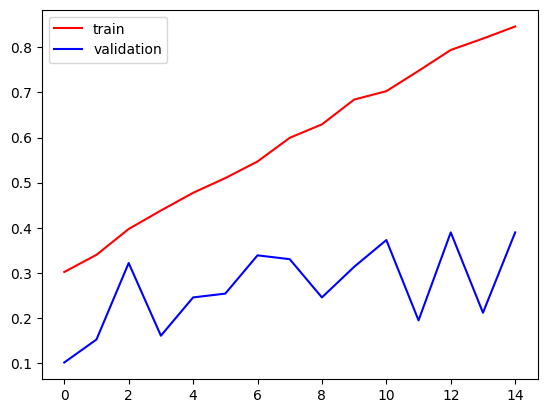

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

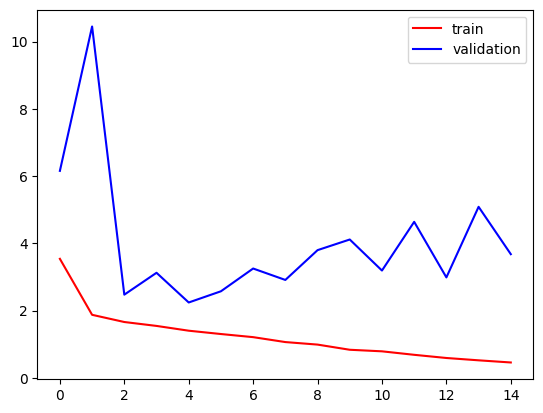

In [19]:
# validation score also decressing when train data is decressing after incressing the epochs
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()